In [1]:
from shapely import *
polygon = Polygon([(.0,.0),(.1,.0),(.1,.1),(.0,.1)])

In [2]:
polygon.is_valid

True

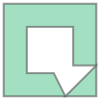

In [3]:
real=polygon.difference(Polygon([(.025,.025),(.075,.025),(.075,.075),(.025,.075)]))
real.is_valid

real=real.difference(Polygon([(.0666,.0),(.1,.0333),(.0666,.0333),(.0333,.0666)]))
real


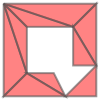

In [4]:

from shapely.ops import triangulate
navmesh=[]
for p in real.geoms:
    navmesh.extend((t for t in triangulate(p) if t.within(real)))

navmesh=MultiPolygon(navmesh)

navmesh

In [5]:
from navmesh import *

nv=build_navmesh(polygon,[Polygon([(.025,.025),(.075,.025),(.075,.075),(.025,.075)]),Polygon([(.0666,.0),(.1,.0333),(.0666,.0333),(.0333,.0666)])])

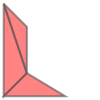

In [6]:

p=list(nv.adjacent.keys())[0]
MultiPolygon([p,*nv.adjacent[p]])

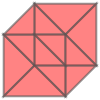

In [7]:
a = Polygon([(.0,.0),(.1,.0),(.1,.1),(.0,.1)]).boundary
b = Polygon([(.05,.05),(.15,.05),(.15,.15),(.05,.15)]).boundary
MultiPolygon(triangulate(a.union(b)))

In [8]:
import matplotlib.pyplot as plt
from shapely.plotting import plot_polygon,plot_points,plot_line


(<matplotlib.patches.PathPatch at 0x1bd24613370>,
 <matplotlib.lines.Line2D at 0x1bd246133a0>)

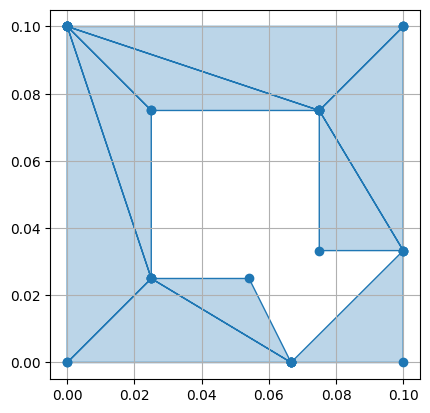

In [9]:
fig=plt.figure()

plot_polygon(navmesh)

Finished tri find in 0.001s


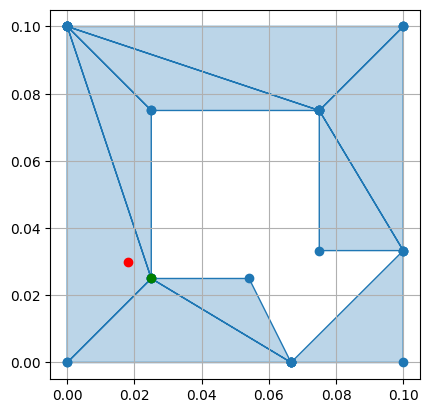

In [12]:
original_p = Point(.018, .03)
p,inside,border=approx_navmesh(nv,original_p)

fig=plt.figure()

plot_polygon(navmesh)
plot_points(original_p, color='red')
plot_points(p,color='green')